In [6]:
import pypsa
import pandas as pd
from matplotlib.pyplot import legend
import matplotlib.pyplot as plt
import numpy as np

### Read Network

In [2]:
# export
#n0 = 
# mar_es
n1 = pypsa.Network('../../resources/mar_es_only/elec_s_4_ec_lc1.0_Co2L_144H_2030_0.071_DF_nosmr.nc')
print("The network representing MAR ES only 'n1' has been imported")
# mar_es_export (10 TWh)
n2 = pypsa.Network('../../resources/mar_es_export/elec_s_4_ec_lc1.0_Co2L_144H_2030_0.071_DF_nosmr.nc')
print("The network representing MAR ES + Export 'n2' has been imported")

n3 = pypsa.Network('../../resources/export_only/elec_s_4_ec_lc1.0_Co2L_144H_2030_0.071_DF_solved.nc')
print("The network representing Export only 'n3' has been imported")

INFO:pypsa.io:Imported network elec_s_4_ec_lc1.0_Co2L_144H_2030_0.071_DF_nosmr.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


The network representing MAR ES only 'n1' has been imported


INFO:pypsa.io:Imported network elec_s_4_ec_lc1.0_Co2L_144H_2030_0.071_DF_nosmr.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


The network representing MAR ES + Export 'n2' has been imported


INFO:pypsa.io:Imported network elec_s_4_ec_lc1.0_Co2L_144H_2030_0.071_DF_solved.nc has buses, carriers, generators, links, loads, stores


The network representing Export only 'n3' has been imported


### Compare solar and wind generator capacities

In [ ]:
# Maximum potential "p_nom_max" of each carrier in each network
for n in [n1, n2, n3]:
    for carrier in ['onwind', 'solar']: #for all generators use: n.generators.carrier.unique():
        print(f"p_nom_max of {carrier}: \t {n.generators[n.generators.carrier==carrier].p_nom_max.sum()/1e3:.2f} GW")

In [ ]:
# Optimised capacities "p_nom_opt" of each carrier in each network
for n in [n1, n2, n3]:
    for carrier in ['onwind', 'solar']: #for all generators use: n.generators.carrier.unique():
        print(f"p_nom_opt of {carrier}: \t {n.generators[n.generators.carrier==carrier].p_nom_opt.sum()/1e3:.2f} GW")

In [ ]:
# Exploitation of the potential of each carrier in each network
for n in [n1, n2, n3]:
    for carrier in ['onwind', 'solar']: #for all generators use: n.generators.carrier.unique():
        print(f"Exploitation of {carrier}: \t {(n.generators[n.generators.carrier==carrier].p_nom_opt.sum()/n.generators[n.generators.carrier==carrier].p_nom_max.sum())*1e2:.2f} %")

### Compare all generator capacities

In [ ]:
# Show all capacities
print("The installed generator capacities are:")
for n in [n1, n2, n3]:
    generator_capacities = n.generators.p_nom_opt.groupby(n.generators.carrier).sum()/1e3
    print(generator_capacities)
del n

### Emissions

In [ ]:
n3.global_constraints

### Total system cost and LCOH

In [15]:
cost_difference= (n2.objective-n1.objective) # in €

export_demand = n2.loads_t.p.loc[:, 'H2 export load'].sum() # in MWh
export_demand_weighted = export_demand*n2.snapshot_weightings.generators[0] # We need to multiply by the snapshot weightings to get the annualized value

n12_lcoh = cost_difference/(n2.loads_t.p.loc[:, 'H2 export load'].sum()*n2.snapshot_weightings.generators[0]) # Cost difference between systems divided by the export demand
n3_lcoh = n3.objective/(n3.loads_t.p.loc[:, 'H2 export load'].sum()*n3.snapshot_weightings.generators[0])

print(f"The following values relate to the comparison of the MAR ES only and the MAR ES + Export network:\n")
print(f"The total annualized system cost for Morocco is {n1.objective / 1e9:.2f} B€ without export and {n2.objective /1e9:.2f} B€ with export")
print(f"The export of {export_demand_weighted/1e3:.2f} GWh results in a cost difference of {cost_difference/ 1e9:.2f} B€")
print(f"Cost per unit hydrogen export: {n12_lcoh:.2f} €/MWh" )
print(f"\nThe following values relate to Export only network:\n")
print(f"The total annualized system cost for Export only is {n3.objective / 1e9:.2f} B€")

print(f"Cost per unit hydrogen export: {n3_lcoh:.2f} €/MWh" )

The following values relate to the comparison of the MAR ES only and the MAR ES + Export network:

The total annualized system cost for Morocco is 212.75 B€ without export and 213.50 B€ with export
The export of 10027.40 GWh results in a cost difference of 0.75 B€
Cost per unit hydrogen export: 75.14 €/MWh

The following values relate to Export only network:

The total annualized system cost for Export only is 0.53 B€
Cost per unit hydrogen export: 52.82 €/MWh


### Plotting

LCOH

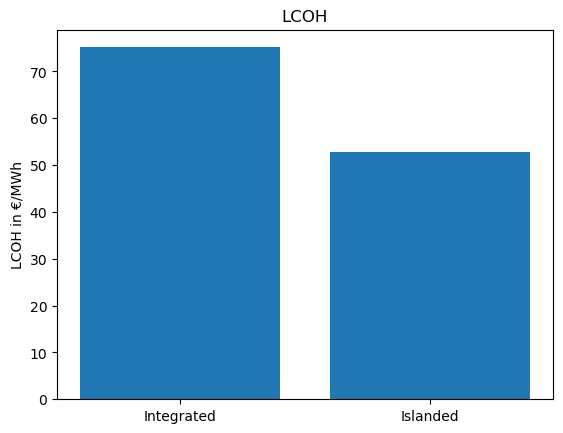

In [29]:
# Prepare data
n_names = ["Integrated", "Islanded"]
costs = [n12_lcoh, n3_lcoh]
y_pos = np.arange(len(n_names))
# Create bars
plt.bar(y_pos, costs)

# Enhance graph
plt.xticks(y_pos, n_names)
plt.ylabel("LCOH in €/MWh")
plt.title("LCOH")

# Show graph
plt.show()

Total system cost

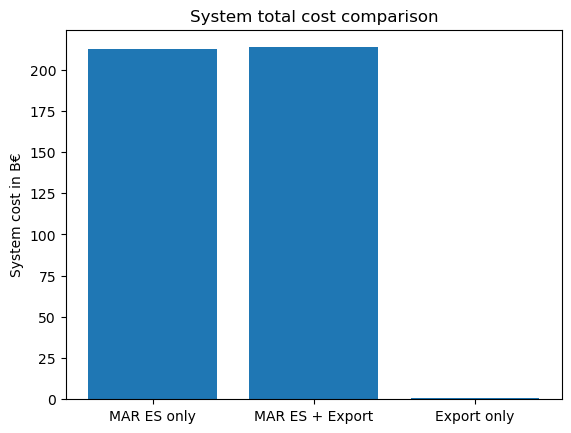

In [27]:
n_names = ["MAR ES only", "MAR ES + Export", "Export only"]
costs = [n1.objective/1e9, n2.objective/1e9, n3.objective/1e9]
y_pos = np.arange(len(n_names))
# Create bars
plt.bar(y_pos, costs)

# Enhance graph
plt.xticks(y_pos, n_names)
plt.ylabel("System cost in B€")
plt.title("System total cost comparison")

# Show graph
plt.show()

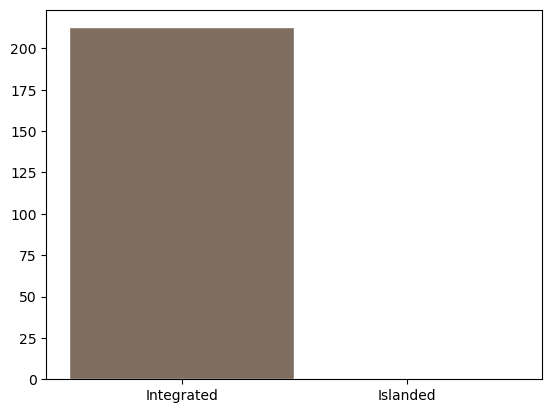

In [39]:
n_names = ["Integrated", "Islanded"]
costs2 = [n2.objective/1e9]
costs13 = [n1.objective/1e9, n3.objective/1e9]

bars = np.add(costs13, costs2).tolist()

# The position of the bars on the x-axis
r = [0,1]
barWidth = 1

# Create brown bars
plt.bar(r, costs13, color='#7f6d5f', edgecolor='white', width=barWidth)

# Create green bars (middle), on top of the first ones
#plt.bar(r, costs2, bottom=costs13, color='#557f2d', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, n_names)
 
# Show graphic
plt.show()

In [ ]:
n3.iplot(mapbox=True)

### Energy: Electrolysis output (n2 only, no comparison)

Capacities

In [ ]:
# Total capacity Electrolysis. TODO very low -> SMR?
n2.links[n2.links.carrier.str.contains('H2 Electrolysis')].p_nom_opt.sum() /1e3 # in GW

In [ ]:
# Total capacity SMR
n2.links[n2.links.carrier.str.contains('SMR')].p_nom_opt.sum() /1e3 # in GW

In [ ]:
# Total capacity Fischer-Tropsch    
n2.links[n2.links.carrier.str.contains('Fischer-Tropsch')].p_nom_opt.sum() /1e3 # in GW

In [ ]:
# Total power per hour SMR
n2.links_t.p1.loc[:, n2.links_t.p1.columns.str.contains("SMR")].sum(axis=1)

Energies

In [ ]:
# Total energy SMR
(n2.links_t.p1.loc[:, n2.links_t.p0.columns.str.contains("SMR")].sum(axis=1) * n2.snapshot_weightings.generators[0]).sum() / 1e6 # in TWh

In [ ]:
# Total energy Fischer-Tropsch
(n2.links_t.p1.loc[:, n2.links_t.p0.columns.str.contains("Fischer-Tropsch")].sum(axis=1) * n2.snapshot_weightings.generators[0]).sum() / 1e6 # in TWh

### Demands (n2 only, no comparison)

In [ ]:
n2.loads.carrier.unique() #.str.contains("H2")

In [ ]:
# Show hydrogen demand of n2 network
(n2.loads_t.p.loc[:, n2.loads_t.p.columns.str.contains("H2")].sum() *n2.snapshot_weightings.generators[0]).sum()/1e6 # in TWh


In [ ]:
# For comparison: Show hydrogen demand of n1 network
(n1.loads_t.p.loc[:, n1.loads_t.p.columns.str.contains("H2")].sum() *n1.snapshot_weightings.generators[0]).sum()/1e6 # in TWh


In [ ]:
# Show highest consumers of n2 network
((n2.loads_t.p.sum()*n2.snapshot_weightings.generators[0]).sort_values(ascending=False)/1e6)[:10] # in TWh

### Export

In [ ]:
# Timeseries from export links
n2.links_t.p0.loc[:, n2.links_t.p0.columns.str.contains("export")].sum(axis=1)

In [ ]:
# Total export per port
n2.links_t.p0.loc[:, n2.links_t.p0.columns.str.contains("export")].sum(axis=0)*n2.snapshot_weightings.generators[0]/1e6 # in TWh

In [ ]:
# Timeseries export load
n2.loads_t.p.loc[:, n2.loads_t.p.columns.str.contains('export')]

In [ ]:
# Total export energy
print(f"The total export for n1 is {n1.loads_t.p.loc[:, n1.loads_t.p.columns.str.contains('export')].sum().values[0]*n2.snapshot_weightings.generators[0]:.2f} MWh")
print(f"The total export for n2 is {n2.loads_t.p.loc[:, n2.loads_t.p.columns.str.contains('export')].sum().values[0]*n2.snapshot_weightings.generators[0]:.2f} MWh")

In [ ]:
print(f"The optimized energy capacity of the H2 export store is {n2.stores.e_nom_opt['H2 export store']/1e3:.2f} GWh")

In [ ]:
(-n2.stores_t.p['H2 export store'] * n2.snapshot_weightings.stores).plot(legend=True)
n2.stores_t.e['H2 export store'].plot(legend=True)